In [1]:
# create dataframe
# picked the features
# figure out which figures are representative and valid
# find summery stats for each feature
# check for dataleakage with each feature
# select which features we want to use in our model
# create test/train split
# create three models using logistics regression, random forest, and discision tree
# validate/optimize the model

In [2]:
#Import dependencies and read in data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn import tree
import pydotplus
from IPython.display import Image

df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
pd.options.display.max_columns = None
display(df)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
#checking Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
#look at dataframe
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#sort dataframe for diabetes_binary, highbp, highchol, cholcheck, bmi, smoker, stroke, heart deseaseor attack, physactivity, fruits, veggies, hvyalcoholcunsump, genhealth, menthealth, physhealth, diffwalk, sex, education
diabetes_df = df[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education']]
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0


In [6]:
#0= no
#1= yes
diabetes_df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [7]:
#0= no
#1= yes
diabetes_df['HighChol'].value_counts()

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

In [8]:
diabetes_df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [9]:
diabetes_df['BMI'].value_counts()

BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

In [10]:
#0= no
#1= yes
diabetes_df['CholCheck'].value_counts()

CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64

In [11]:
#0= no
#1= yes
diabetes_df['Smoker'].value_counts()

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64

In [12]:
#0= no
#1= yes
diabetes_df['Stroke'].value_counts()

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64

In [13]:
#0= no
#1= yes
diabetes_df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [14]:
#0= no
#1= yes
diabetes_df['PhysActivity'].value_counts()

PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64

In [15]:
#0= no
#1= yes
diabetes_df['Fruits'].value_counts()

Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64

In [16]:
#0= no
#1= yes
diabetes_df['Veggies'].value_counts()

Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64

In [17]:
#0= no consumption
#1= heavy consumption
diabetes_df['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64

In [18]:
#scale of of health 1-5 1 being the best
diabetes_df['GenHlth'].value_counts()

GenHlth
2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: count, dtype: int64

In [19]:
#how many days in the past 30 was your health not good
diabetes_df['MentHlth'].value_counts()

MentHlth
0.0     175680
2.0      13054
30.0     12088
5.0       9030
1.0       8538
3.0       7381
10.0      6373
15.0      5505
4.0       3789
20.0      3364
7.0       3100
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: count, dtype: int64

In [20]:
#how many days in the past 30 was your health not good
diabetes_df['PhysHlth'].value_counts()

PhysHlth
0.0     160052
30.0     19400
2.0      14764
1.0      11388
3.0       8495
5.0       7622
10.0      5595
15.0      4916
4.0       4542
7.0       4538
20.0      3273
14.0      2587
25.0      1336
6.0       1330
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: count, dtype: int64

In [21]:
#0= no
#1= yes
diabetes_df['DiffWalk'].value_counts()

DiffWalk
0.0    211005
1.0     42675
Name: count, dtype: int64

In [22]:
#0= female
#1= male
diabetes_df['Sex'].value_counts()

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

In [23]:
#1=18-24
#9=60-64
#13=80 and up
diabetes_df['Age'].value_counts()

Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64

In [24]:
#1=never attended school/only kindergarden
#6=colledge grad 
diabetes_df['Education'].value_counts()

Education
6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

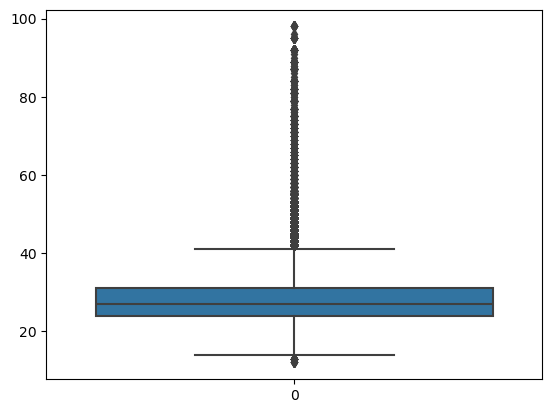

In [25]:
#check outliers and decide wheather to keep them or get rid of them 
sns.boxplot(diabetes_df['BMI'])
plt.show

In [26]:
diabetes_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
dtype: int64

In [27]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = diabetes_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# Review the X_train DataFrame
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
55941,0.0,1.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,3.0,0.0,1.0,3.0,1.0
214461,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,1.0,6.0,6.0
232087,1.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,0.0,0.0,9.0,4.0
40730,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,11.0,6.0
39332,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,1.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236877,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,1.0,30.0,0.0,1.0,7.0,5.0
96453,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,4.0
117379,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0
37556,0.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,9.0,5.0


In [29]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression()


In [30]:
# Fit the model
logistic_regression_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.8624671502154946
Testing Data Score: 0.8625197098707033


In [32]:
# Generate predictions from the model we just fit
predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df

,Prediction,Actual
55941,0.0,0.0
214461,0.0,0.0
232087,0.0,0.0
40730,0.0,0.0
39332,0.0,0.0
...,...,...
236877,0.0,0.0
96453,0.0,0.0
117379,0.0,0.0
37556,0.0,0.0


In [33]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

In [34]:
# Display the results DataFrame
results_df

,Testing Data Predictions,Testing Data Actual Targets
76746,0.0,0.0
38372,0.0,0.0
2868,0.0,0.0
125017,0.0,0.0
89188,0.0,1.0
...,...,...
133281,0.0,0.0
240287,0.0,0.0
109833,0.0,0.0
50001,0.0,0.0


In [35]:
# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)



0.8625197098707033

In [36]:
# Split training and testing sets
# Create the features DataFrame, X
X = diabetes_df.copy()
X = X.drop(columns='Diabetes_binary')

# Create the target DataFrame, y
y = diabetes_df['Diabetes_binary']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [37]:
# Define target vector
y = diabetes_df["Diabetes_binary"].values.reshape(-1, 1)
y[:5]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [39]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fit the model
model = model.fit(X_train, y_train)



In [40]:
# Making predictions using the testing data
predictions = model.predict(X_test)



In [41]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")



Accuracy Score : 0.8039577420372123


In [42]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
# Define features set
X = diabetes_df.copy()
X.drop("Diabetes_binary", axis=1, inplace=True)
X.head()

In [ ]:
# Define target set
y = diabetes_df["Diabetes_binary"].ravel()
y[:5]

In [ ]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [ ]:
# Fit the model
rf_model = rf_model.fit(X_train, y_train)

In [ ]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

In [ ]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Display results
print(f"Accuracy Score : {acc_score}")

In [ ]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]